In [131]:
import tensorflow as tf
import numpy as np
import pandas as pd
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [132]:
X_train = X_train/255
X_test = X_test/255

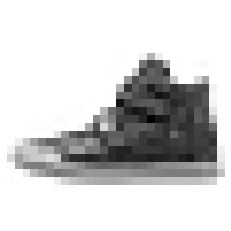

In [133]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[142], cmap="binary") 
plt.axis('off')
plt.show()

In [134]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [135]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [136]:
model.output_shape

(None, 10)

In [137]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [138]:
model.compile(optimizer="sgd", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics="accuracy")

In [139]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [140]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [141]:
from sklearn.model_selection import train_test_split
X_train_valid, X_train90, y_train_valid, y_train90 = train_test_split(X_train, y_train, test_size=0.9)
model.fit(X_train, y_train, epochs=20, validation_data=(X_train_valid, y_train_valid), callbacks=tensorboard_cb)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6961 - accuracy: 0.7699 - val_loss: 0.4958 - val_accuracy: 0.8310
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4821 - accuracy: 0.8319 - val_loss: 0.4460 - val_accuracy: 0.8398
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8471 - val_loss: 0.4031 - val_accuracy: 0.8595
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8571 - val_loss: 0.3919 - val_accuracy: 0.8615
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3928 - accuracy: 0.8624 - val_loss: 0.3881 - val_accuracy: 0.8628
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8681 - val_loss: 0.3660 - val_accuracy: 0.8715
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8721 - val_loss: 0.3615 - val_accuracy:

In [142]:
len(X_train_valid)

6000

In [143]:
len(X_train90)

54000

Prediction: but
Confidence: 0.9995536
Truth: but


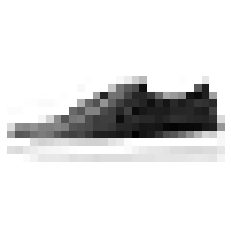

In [144]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [145]:
model.save('fashion_clf.h5')

In [146]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing(as_frame=True)

In [147]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [149]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [150]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(1))

In [151]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss='mse', optimizer='sgd', metrics='mse')

In [153]:
import os
root_logdir = os.path.join(os.curdir, " housing_logs")

def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [154]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [155]:
model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/40
363/363 [==============================] - 1s 4ms/step - loss: 0.9383 - mse: 0.9383 - val_loss: 1.8109 - val_mse: 1.8109
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - mse: 0.4862 - val_loss: 0.5084 - val_mse: 0.5084
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 1.4151 - val_mse: 1.4151
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4537 - mse: 0.4537 - val_loss: 10.6035 - val_mse: 10.6035
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4656 - mse: 0.4656 - val_loss: 6.1970 - val_mse: 6.1970
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4521 - mse: 0.4521 - val_loss: 0.3792 - val_mse: 0.3792
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4014 - mse: 0.4014 - val_loss: 0.3865 - val_mse: 0.3865
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 

In [ ]:
model.svae("reg_housing_1.h5")

In [162]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(X_train.shape[1:][0], activation="relu", input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [163]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_40 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 31        
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(loss='mse', optimizer='sgd', metrics='mse')

In [166]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [167]:
model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/40
363/363 [==============================] - 2s 6ms/step - loss: 0.8075 - mse: 0.8075 - val_loss: 0.4831 - val_mse: 0.4831
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4534 - mse: 0.4534 - val_loss: 0.6178 - val_mse: 0.6178
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.4033 - val_mse: 0.4033
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - mse: 0.4040 - val_loss: 0.4501 - val_mse: 0.4501
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - mse: 0.3973 - val_loss: 0.4073 - val_mse: 0.4073
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3912 - mse: 0.3912 - val_loss: 0.5400 - val_mse: 0.5400
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.4838 - val_mse: 0.4838
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model.save("reg_housing_2.h5")

In [184]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [185]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_59 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_60 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 31        
Total params: 3,991
Trainable params: 3,991
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(loss='mse', optimizer='sgd', metrics='mse')

In [187]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [188]:
model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/40
363/363 [==============================] - 2s 5ms/step - loss: 0.6913 - mse: 0.6913 - val_loss: 1.4009 - val_mse: 1.4009
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 2.1662 - val_mse: 2.1662
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4115 - mse: 0.4115 - val_loss: 1.3105 - val_mse: 1.3105
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3738 - mse: 0.3738 - val_loss: 2.4199 - val_mse: 2.4199
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3852 - mse: 0.3852 - val_loss: 1.1619 - val_mse: 1.1619
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - mse: 0.3624 - val_loss: 0.9132 - val_mse: 0.9132
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3508 - mse: 0.3508 - val_loss: 0.3738 - val_mse: 0.3738
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model.save("reg_housing_3.h5")